In [1]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
fp = "./prior_pred_samps.pkl"

In [3]:
with open(fp, "rb") as fh:
    prior_pred = pkl.load(fh)

In [4]:
fp = os.path.abspath('model_set.csv')
raw_df = pd.read_csv(fp)

In [5]:
# data transforms
raw_df["LogSalePrice"] = np.log(raw_df.SalePrice)
raw_df["CntrLogSalePrice"] = raw_df.LogSalePrice - raw_df.LogSalePrice.mean()
raw_df.CentralAir = [1 if i == "Y" else 0 for i in raw_df.CentralAir]
raw_df.YrSold = raw_df.YrSold - raw_df.YrSold.min()  # years from 2006
raw_df.YearBuilt = raw_df.YearBuilt - raw_df.YearBuilt.min()  # years from 1872

# drop unecessary cols
d_cols = ["Utilities"]
raw_df.drop(columns=d_cols, inplace=True)

In [6]:
# design matix
covariates = ["YrSold", "YearBuilt", "1stFlrSF", "CentralAir", "LotArea"]
y = raw_df.LogSalePrice.values
X = raw_df.loc[:, covariates].values
n, p = X.shape

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)

In [7]:
list(prior_pred.keys())

['Omega_stds',
 'beta',
 'Omega_cholesky-cov-packed__',
 'Omega_corr',
 'y_obs',
 'alpha',
 'Omega',
 'cov',
 'mu_alpha',
 'sigma',
 'tau_alpha_log__',
 'sigma_log__',
 'tau_alpha']

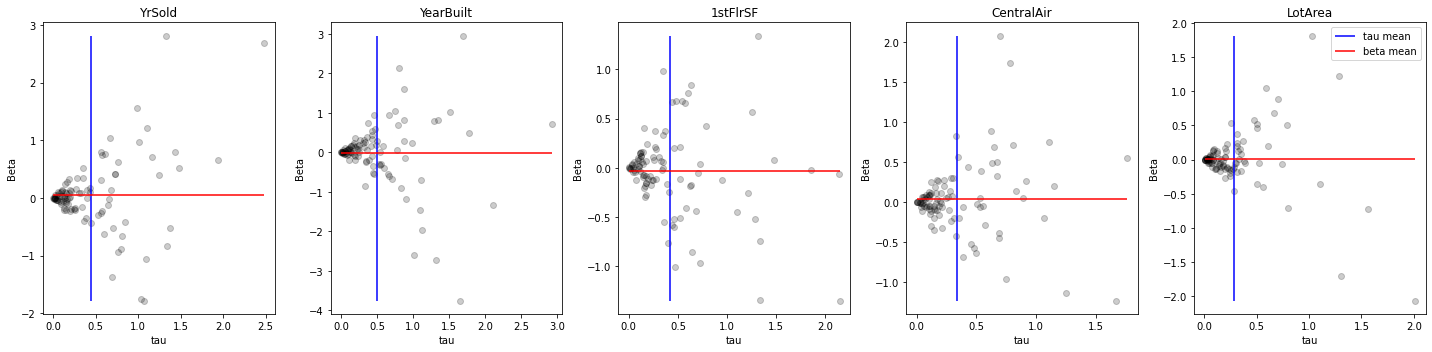

In [8]:
n, p = prior_pred["beta"].shape
fig, ax = plt.subplots(nrows=1, ncols=p, figsize=(20, 5))
for i in range(p):
    ax[i].scatter(prior_pred["Omega_stds"][:,i],
                  prior_pred["beta"][:,i], alpha=0.2, color="black")
    ax[i].vlines(x=prior_pred["Omega_stds"][:,i].mean(),
                 ymin=prior_pred["beta"][:,i].min(),
                 ymax=prior_pred["beta"][:,i].max(),
                 color="blue", label="tau mean")
    ax[i].hlines(y=prior_pred["beta"][:,i].mean(),
                 xmin=prior_pred["Omega_stds"][:,i].min(),
                 xmax=prior_pred["Omega_stds"][:,i].max(),
                 color="red", label="beta mean")
    ax[i].set_title(covariates[i])
    ax[i].set_xlabel("tau")
    ax[i].set_ylabel("Beta")
plt.tight_layout()
plt.legend()
plt.show()

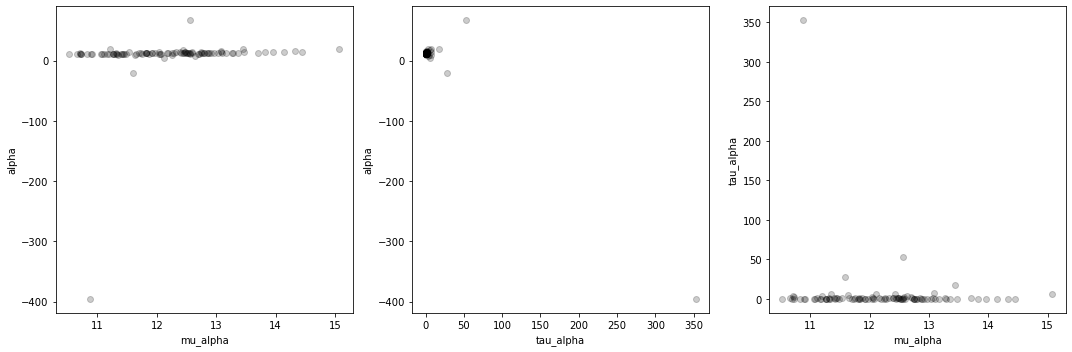

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax[0].scatter(prior_pred["mu_alpha"],
              prior_pred["alpha"],
              alpha=0.2, color="black")
ax[0].set_xlabel("mu_alpha")
ax[0].set_ylabel("alpha")
ax[1].scatter(prior_pred["tau_alpha"],
              prior_pred["alpha"],
              alpha=0.2, color="black")
ax[1].set_xlabel("tau_alpha")
ax[1].set_ylabel("alpha")
ax[2].scatter(prior_pred["mu_alpha"],
              prior_pred["tau_alpha"],
              alpha=0.2, color="black")
ax[2].set_xlabel("mu_alpha")
ax[2].set_ylabel("tau_alpha")
plt.tight_layout()
plt.show()

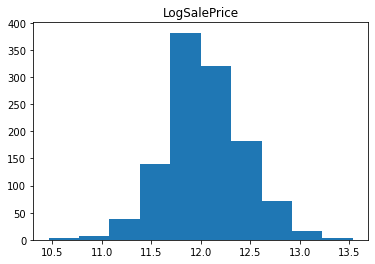

In [10]:
plt.hist(raw_df["LogSalePrice"])
plt.title("LogSalePrice")
plt.show()

In [11]:
print(raw_df["LogSalePrice"].mean())
print(prior_pred["y_obs"].mean())

12.033653940312753
79.78386616867941


In [12]:
print(raw_df["LogSalePrice"].std())
print(prior_pred["y_obs"].std())

0.3944602040501095
6533.827566464468


In [13]:
covariates

['YrSold', 'YearBuilt', '1stFlrSF', 'CentralAir', 'LotArea']

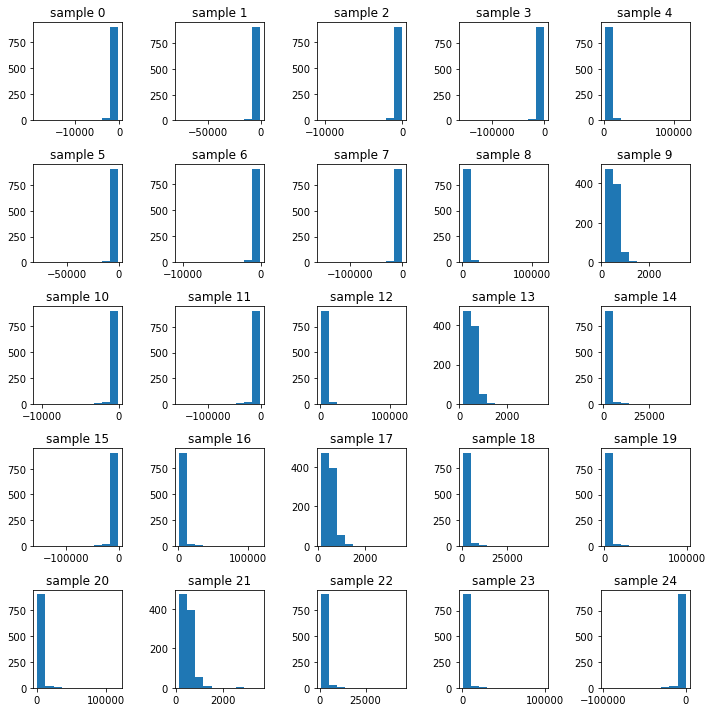

In [14]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(10,10))
c = 0
for i in range(5):
    for j in range(5):
        ax[i,j].hist(prior_pred["y_obs"][i+j,:])
        ax[i,j].set_title(f"sample {c}")
        c += 1
plt.tight_layout()
plt.show()